# Credit Card Fraud Detection - Capstone Project

In [20]:
# import libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# visibility
pd.options.display.max_columns=100

In [21]:
credit_data = pd.read_csv('creditcard.csv')
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
# check Time column
print(credit_data.Time.nunique())
print(credit_data.Time.value_counts())

124592
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
81790.0      1
54289.0      1
37651.0      1
112892.0     1
119665.0     1
Name: Time, Length: 124592, dtype: int64


In [23]:
# class imbalance status
credit_data.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [24]:
# data size
credit_data.shape

(284807, 31)

In [25]:
# check null values
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- No Null Values in any column

In [26]:
# check info
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
# describe all the columns
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [28]:
# import machine learning libraris to perform machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve, recall_score, precision_score

In [29]:
# assign X and y
X = credit_data.drop(['Time','Class'], axis=1)
y = credit_data['Class']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [30]:
# sizes of all data splits before OVER SAMPLING
print("TRAIN DATA")
print("X_train: {}, y_train: {}\n".format(X_train.shape, y_train.shape))
print("TEST DATA")
print("X_test: {}, y_test: {}\n".format(X_test.shape, y_test.shape))

TRAIN DATA
X_train: (199364, 29), y_train: (199364,)

TEST DATA
X_test: (85443, 29), y_test: (85443,)



In [31]:
# oversampling the data to reduce class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test, y_test = sm.fit_resample(X_test, y_test)

In [32]:
# sizes of all data splits after OVER SAMPLING
print("TRAIN DATA")
print("X_train: {}, y_train: {}\n".format(X_train.shape, y_train.shape))
print("TEST DATA")
print("X_test: {}, y_test: {}\n".format(X_test.shape, y_test.shape))

TRAIN DATA
X_train: (398040, 29), y_train: (398040,)

TEST DATA
X_test: (170590, 29), y_test: (170590,)



In [33]:
print("y_train Details: ")
print(y_train.value_counts(normalize=True))

print("===========================")

print("y_test Details: ")
print(y_test.value_counts(normalize=True))


y_train Details: 
0    0.5
1    0.5
Name: Class, dtype: float64
y_test Details: 
0    0.5
1    0.5
Name: Class, dtype: float64


## Using LogisticRegression Pipeline

In [35]:
# steps in pipeline
steps = [
    ("Preprocessing", StandardScaler()),
    ("Classifier", LogisticRegression(solver='liblinear'))
]

# pipeline object
pipe_LogRegg = Pipeline(steps=steps)

# call fit as we would call classifiers
pipe_LogRegg.fit(X_train, y_train)

Pipeline(steps=[('Preprocessing', StandardScaler()),
                ('Classifier', LogisticRegression(solver='liblinear'))])

In [36]:
# evaluation functions

def all_classification_metrics(actual_output, predicted_output):
    print(confusion_matrix(actual_output, predicted_output))
    print(classification_report(actual_output, predicted_output))
    print("Accuracy:",round(accuracy_score(actual_output, predicted_output), 3))
    print("Recall:", round(recall_score(actual_output, predicted_output), 3))
    print("Precision:", round(precision_score(actual_output, predicted_output), 3))


def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    # print train data metric scores
    print("TRAIN data Details: ")
    all_classification_metrics(y_train, y_train_pred)
    print("="*50,"\n")
    # print test data metric scores
    print("TEST data Details: ")
    all_classification_metrics(y_test, y_test_pred)
    print("="*50,"\n")
    
    # Plot ROC_AUC Curve
    plot_roc_curve(model, X_test, y_test)
    plt.title('ROC_AUC Curve', fontsize=16)
    plt.show()

### Evaluation

TRAIN data Details: 
[[195737   3283]
 [ 10728 188292]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    199020
           1       0.98      0.95      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.97      0.96      0.96    398040
weighted avg       0.97      0.96      0.96    398040

Accuracy: 0.965
Recall: 0.946
Precision: 0.983

TEST data Details: 
[[83834  1461]
 [ 7510 77785]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85295
           1       0.98      0.91      0.95     85295

    accuracy                           0.95    170590
   macro avg       0.95      0.95      0.95    170590
weighted avg       0.95      0.95      0.95    170590

Accuracy: 0.947
Recall: 0.912
Precision: 0.982



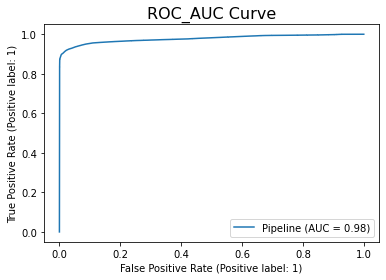

In [37]:
evaluation(pipe_LogRegg)

## Using XGBoost Classifier Pipeline

In [39]:
# import libraries
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# steps in pipeline
steps_xgb = [
    ("Preprocessing", StandardScaler()),
    ("Classifier", XGBClassifier(tree_method='gpu_hist', random_state=42))
]

# pipeline object
pipe_xbg = Pipeline(steps=steps_xgb)

# hypertuning parameters
params = {
    'Classifier__learning_rate': [0.1, 0.2, 0.3, 0.4],
    'Classifier__max_depth': [20, 25, 30, 35],
    'Classifier__n_estimators': [100, 200, 300, 400]
}

# randomSearchCV
randomized_model = RandomizedSearchCV(estimator=pipe_xbg, param_distributions=params, n_jobs=-1, cv=4,
                          verbose=2, scoring='accuracy')

In [41]:
%%time
randomized_model.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[19:58:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 37.3 s, sys: 753 ms, total: 38.1 s
Wall time: 2min 27s


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('Preprocessing',
                                              StandardScaler()),
                                             ('Classifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            enable_categorical=False,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type=None,
                                                            interaction_c

In [42]:
best_model = randomized_model.best_estimator_
best_model

Pipeline(steps=[('Preprocessing', StandardScaler()),
                ('Classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=0, importance_type=None,
                               interaction_constraints='', learning_rate=0.4,
                               max_delta_step=0, max_depth=25,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='gpu_hist', validate_parameters=1,
                               verbosity=None))])

TRAIN data Details: 
[[199020      0]
 [     0 199020]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

Accuracy: 1.0
Recall: 1.0
Precision: 1.0

TEST data Details: 
[[85265    30]
 [10050 75245]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     85295
           1       1.00      0.88      0.94     85295

    accuracy                           0.94    170590
   macro avg       0.95      0.94      0.94    170590
weighted avg       0.95      0.94      0.94    170590

Accuracy: 0.941
Recall: 0.882
Precision: 1.0



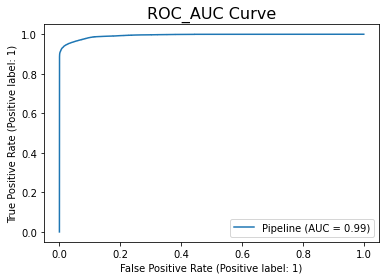

In [43]:
# evaluation
evaluation(best_model)

## Using Ridge classifier

In [44]:
# import libraries
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
# steps in pipeline
steps_l2 = [
    ("Preprocessing", StandardScaler()),
    ("Classifier", RidgeClassifier(random_state=42))
]

# pipeline object
pipe_l2 = Pipeline(steps=steps_l2)

# hypertuning parameters
params = {
    'Classifier__alpha': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# gridSearchCV
grid_model = GridSearchCV(estimator=pipe_l2, param_grid=params, n_jobs=-1, cv=4,
                          verbose=2, scoring='accuracy')

In [46]:
%%time
grid_model.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
CPU times: user 618 ms, sys: 352 ms, total: 970 ms
Wall time: 5.5 s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Preprocessing', StandardScaler()),
                                       ('Classifier',
                                        RidgeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__alpha': [0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='accuracy', verbose=2)

In [47]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('Preprocessing', StandardScaler()),
                ('Classifier', RidgeClassifier(alpha=0.1, random_state=42))])

As the `aplha=0.1`, lets tune again between 0.05 to 0.15

In [48]:
# ridge classifier hyperparameter tuning-2
# steps in pipeline
steps_l2 = [
    ("Preprocessing", StandardScaler()),
    ("Classifier", RidgeClassifier(random_state=42))
]

# pipeline object
pipe_l2 = Pipeline(steps=steps_l2)

# hypertuning parameters
params = {
    'Classifier__alpha': [0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15]
}

# gridSearchCV
grid_model = GridSearchCV(estimator=pipe_l2, param_grid=params, n_jobs=-1, cv=4,
                          verbose=2, scoring='accuracy')

In [49]:
%%time
grid_model.fit(X_train, y_train)

Fitting 4 folds for each of 11 candidates, totalling 44 fits
CPU times: user 658 ms, sys: 246 ms, total: 904 ms
Wall time: 9.22 s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Preprocessing', StandardScaler()),
                                       ('Classifier',
                                        RidgeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__alpha': [0.05, 0.06, 0.07, 0.08, 0.09,
                                               0.1, 0.11, 0.12, 0.13, 0.14,
                                               0.15]},
             scoring='accuracy', verbose=2)

In [50]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('Preprocessing', StandardScaler()),
                ('Classifier', RidgeClassifier(alpha=0.05, random_state=42))])

Looks like `aplha` should be between 0.01 to 0.06

In [56]:
# ridge classifier hyperparameter tuning-2
# steps in pipeline
steps_l2 = [
    ("Preprocessing", StandardScaler()),
    ("Classifier", RidgeClassifier(random_state=42))
]

# pipeline object
pipe_l2 = Pipeline(steps=steps_l2)

# hypertuning parameters
params = {
    'Classifier__alpha': np.linspace(0.01, 0.06, 6)
}

# gridSearchCV
grid_model = GridSearchCV(estimator=pipe_l2, param_grid=params, n_jobs=-1, cv=4,
                          verbose=2, scoring='accuracy')

In [57]:
%%time
grid_model.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
CPU times: user 550 ms, sys: 256 ms, total: 806 ms
Wall time: 5.39 s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('Preprocessing', StandardScaler()),
                                       ('Classifier',
                                        RidgeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06])},
             scoring='accuracy', verbose=2)

In [58]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('Preprocessing', StandardScaler()),
                ('Classifier', RidgeClassifier(alpha=0.01, random_state=42))])

Lets evaluate the model with `aplha=0.01` and based on the result then decide how to proceed further

TRAIN data Details: 
[[196662   2358]
 [ 23992 175028]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    199020
           1       0.99      0.88      0.93    199020

    accuracy                           0.93    398040
   macro avg       0.94      0.93      0.93    398040
weighted avg       0.94      0.93      0.93    398040

Accuracy: 0.934
Recall: 0.879
Precision: 0.987

TEST data Details: 
[[84322   973]
 [17383 67912]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     85295
           1       0.99      0.80      0.88     85295

    accuracy                           0.89    170590
   macro avg       0.91      0.89      0.89    170590
weighted avg       0.91      0.89      0.89    170590

Accuracy: 0.892
Recall: 0.796
Precision: 0.986



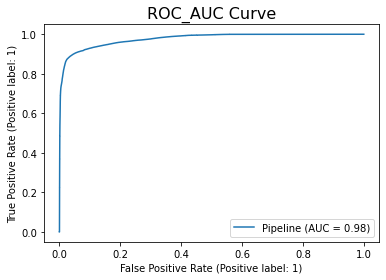

In [59]:
# evaluation with aplha=0.01
evaluation(best_model)